In [1]:
import pandas as pd
import wrangle as wr
import summaries as s
from importlib import reload
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

pd.options.display.float_format = '{:,.2f}'.format



In [6]:
# preprocessing functions are below

In [2]:
df = wr.get_clean_data(start2018=True)
sdf = s.get_summary_df(df)
sdf = wr.add_date_features(sdf)

In [3]:
train, test = wr.split_data(df)

In [22]:
validate = test.loc[:'2022-06'].copy() 
test = test.loc['2022-07':]

In [23]:
pd.concat([validate.tail(1), test.head(1)])

,customer_name,customer_type,customer_city,reseller_name,reseller_city,customer_zip,order_quantity,unit_price,po_number,shipped_date,order_date_copy,month_name,day_name,year,quarter,month,week,day_of_week,day_of_year,purchase_amount
order_date,,,,,,,,,,,,,,,,,,,,
2022-06-30,Navarro County,Local Government,Corsicana,CDW Government LLC,Vernon Hills,75110,4.00,"1,331.22",315940,2022-06-30,2022-06-30,June,Thursday,2022,2,6,26,3,181,"5,324.88"
2022-07-01,Godley Independent School District,K-12,Godley,CDW Government LLC,Vernon Hills,76044,1.00,67.46,0310022241,2022-07-13,2022-07-01,July,Friday,2022,3,7,26,4,182,67.46


In [4]:
train1, test1 = wr.split_data(sdf)

In [36]:
X_train = train.purchase_amount.copy().resample('D').sum()
X_validate = validate.purchase_amount.copy().resample('D').sum()
X_test = test.purchase_amount.copy().resample('D').sum()

<AxesSubplot:xlabel='order_date'>

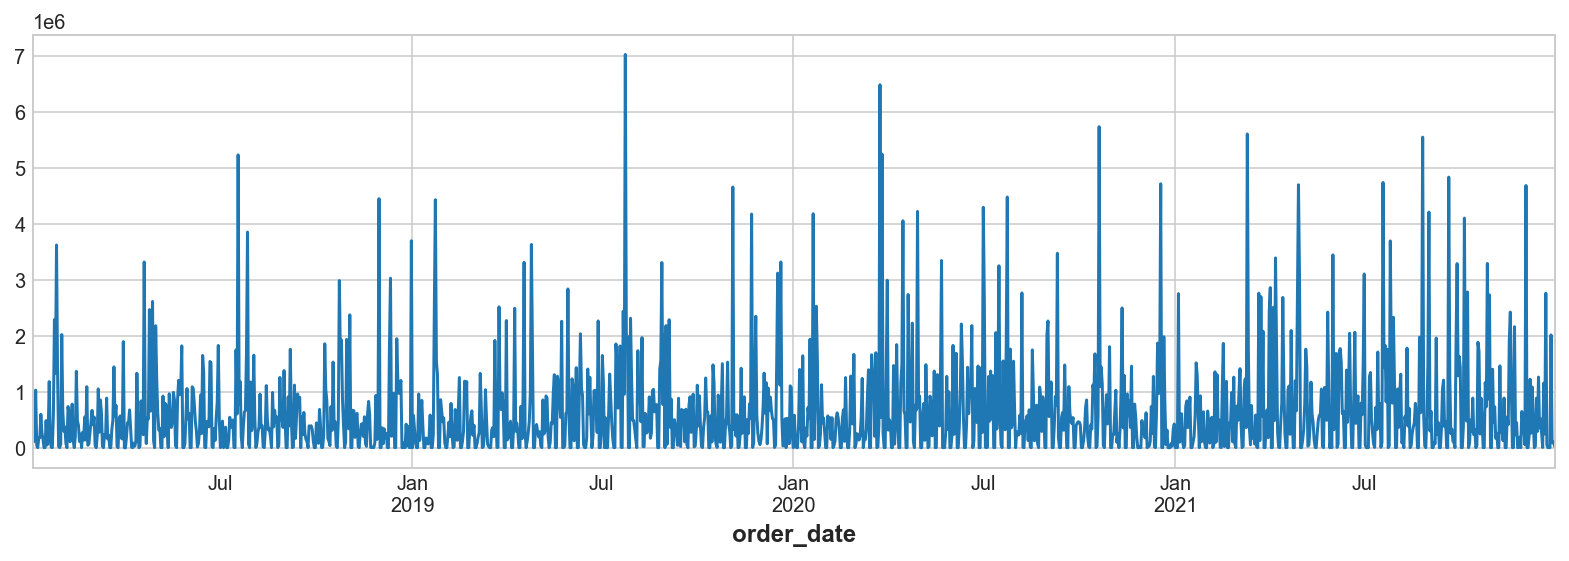

In [37]:
ts = X_train.copy()
ts.plot()

In [28]:
baseline = ts.mean()

In [29]:
baseline

4059.2725781135823

In [31]:
predictions_train = pd.DataFrame(index=train.index)
predictions_validate = pd.DataFrame(index=validate.index)
predictions_train['baseline'] = ts.mean()
predictions_validate['baseline'] = ts.mean()

### Simple Average